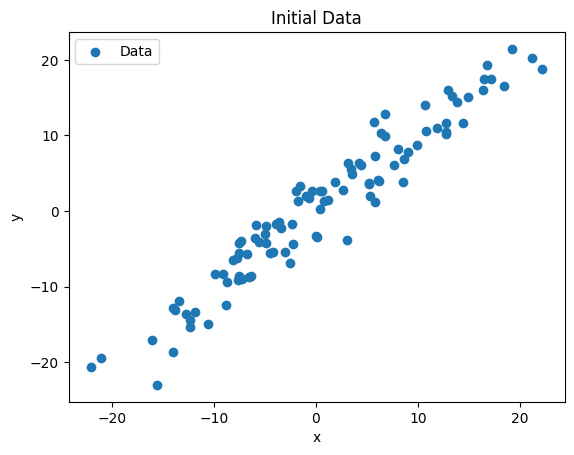

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


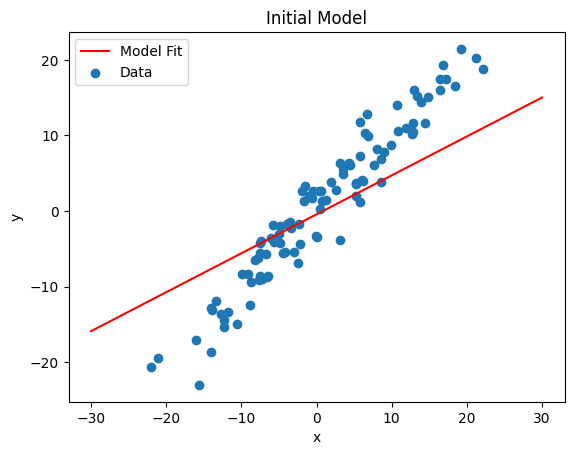

Epoch: 0, Loss: 30.6935
Epoch: 10, Loss: 13.1382
Epoch: 20, Loss: 8.6535
Epoch: 30, Loss: 7.4910
Epoch: 40, Loss: 7.1784
Epoch: 50, Loss: 7.0871
Epoch: 60, Loss: 7.0559
Epoch: 70, Loss: 7.0425
Epoch: 80, Loss: 7.0355
Epoch: 90, Loss: 7.0313


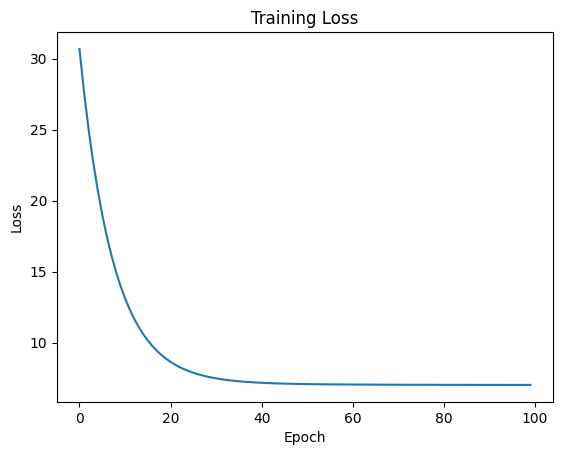

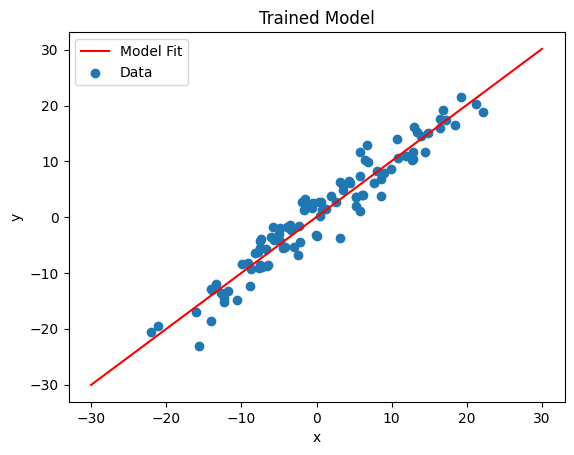

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

# ------------------------------
# Data preparation
# ------------------------------
torch.manual_seed(42)  # for reproducibility
X = torch.randn(100, 1) * 10
y = X + 3 * torch.randn(100, 1)

plt.scatter(X.numpy(), y.numpy(), label="Data")
plt.xlabel('x')
plt.ylabel('y')
plt.title("Initial Data")
plt.legend()
plt.show()

# ------------------------------
# Define simple linear regression model
# ------------------------------
class LR(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.linear(x)

# ------------------------------
# Initialize model
# ------------------------------
torch.manual_seed(1)  # for reproducible weights
model = LR(1, 1)
print(model)

# Extract parameters for plotting
[w, b] = model.parameters()

def get_params():
    return (w[0][0].item(), b[0].item())

# ------------------------------
# Plot function for model fit
# ------------------------------
def plot_fit(title):
    plt.figure()  # new figure
    w1, b1 = get_params()
    x1 = np.array([-30, 30])
    y1 = w1 * x1 + b1
    plt.plot(x1, y1, 'r', label="Model Fit")
    plt.scatter(X.numpy(), y.numpy(), label="Data")
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()

plot_fit('Initial Model')

# ------------------------------
# Training setup
# ------------------------------
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# ------------------------------
# Training loop
# ------------------------------
epochs = 100
losses = []

for i in range(epochs):
    y_pred = model(X)
    loss = criterion(y_pred, y)

    if i % 10 == 0:
        print(f"Epoch: {i}, Loss: {loss.item():.4f}")

    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# ------------------------------
# Plot training loss
# ------------------------------
plt.plot(range(epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Training Loss")
plt.show()

# ------------------------------
# Plot final model fit
# ------------------------------
plot_fit("Trained Model")
